In [1]:
import copy
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import matplotlib.colors as mcolors
palette = list(mcolors.TABLEAU_COLORS.keys())
%matplotlib inline

In [2]:
#sns.set_theme(style="ticks", palette="pastel")
sns.set_theme(style="ticks", palette="muted")
sns.set_context("talk")

In [4]:
data_file = 'plotting_data.xlsx'
df = pd.read_excel(data_file)
# df = df.sort_values(by=['Rescue', 'Conc'], ascending=[False, True]).reset_index(drop=True)

In [5]:
df

,Cell_line,Media,Metformin,Rescue,Replicate,Prlfr,CellVol_mean,CellVol_median
0,H1299,Ser,6 mM,Vec,1,0.011087,15151,13676
1,H1299,Ser,6 mM,Vec,2,0.057760,15392,14483
2,H1299,Ser,6 mM,Vec,3,0.014306,15786,14760
3,H1299,Ser,6 mM,Vec,4,-0.029494,14175,13462
4,H1299,Ser,6 mM,Vec,5,0.025386,14597,13916
...,...,...,...,...,...,...,...,...
91,H1299,NoSer+Form,6 mM,Pyr,2,0.754536,8854,8109
92,H1299,NoSer+Form,6 mM,Pyr,3,0.728759,8974,8334
93,H1299,NoSer+Form,6 mM,Pyr,4,0.772733,8581,7899
94,H1299,NoSer+Form,6 mM,Pyr,5,0.759562,8813,7971


<ipython-input-6-ea109ada9f05>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g1 = sns.barplot(ax=ax1, y='Prlfr', x='Rescue', hue='Media', data=df, edgecolor='black', linewidth=2.5, alpha=0.7, ci=None)
/Users/krdav/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


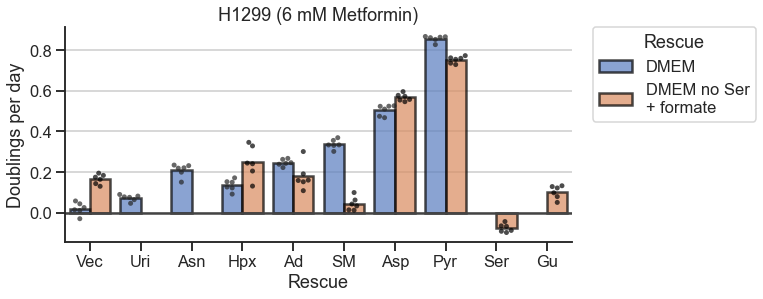

In [6]:
# Plot all data:
fig, ax1 = plt.subplots(1, 1, figsize=(11, 4.5))

g1 = sns.barplot(ax=ax1, y='Prlfr', x='Rescue', hue='Media', data=df, edgecolor='black', linewidth=2.5, alpha=0.7, ci=None)
g1 = sns.swarmplot(ax=ax1, y='Prlfr', x='Rescue', hue='Media', data=df, alpha=0.7, dodge=True, color='black')
g1.set_ylabel('Doublings per day');
g1.set_xlabel('Rescue');
handles, labels = g1.get_legend_handles_labels()
labels = ['DMEM', 'DMEM no Ser\n+ formate']
g1.legend(loc='upper left', bbox_to_anchor=(1.04, 1), borderaxespad=0, title='Rescue', labels=labels, handles=handles[2:4])
g1.grid(True, axis='y')
#g1.set_ylim(bottom=-0.5, top=1.5);
g1.set_title('H1299 (6 mM Metformin)')
ax1.axhline(y=0, linestyle='-', zorder=1, linewidth=2.5, color='#444444')
sns.despine()
plt.tight_layout()
fig.savefig('all_data.pdf')

<ipython-input-7-1c43844f6188>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g1 = sns.barplot(ax=ax1, y='Prlfr', x='Rescue', data=df[mask], edgecolor='black', linewidth=2.5, alpha=0.7, ci=None)


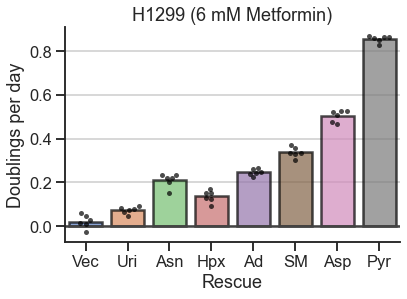

In [7]:
# Plot only normal DMEM media data:
mask = df['Media'] == 'Ser'

fig, ax1 = plt.subplots(1, 1, figsize=(6, 4.5))

g1 = sns.barplot(ax=ax1, y='Prlfr', x='Rescue', data=df[mask], edgecolor='black', linewidth=2.5, alpha=0.7, ci=None)
g1 = sns.swarmplot(ax=ax1, y='Prlfr', x='Rescue', data=df[mask], alpha=0.7, color='black')
g1.set_ylabel('Doublings per day');
g1.set_xlabel('Rescue');
g1.grid(True, axis='y')
#g1.set_ylim(bottom=-0.5, top=1.5);
g1.set_title('H1299 (6 mM Metformin)')
ax1.axhline(y=0, linestyle='-', zorder=1, linewidth=2.5, color='#444444')
sns.despine()
plt.tight_layout()
fig.savefig('DMEM_data.pdf')


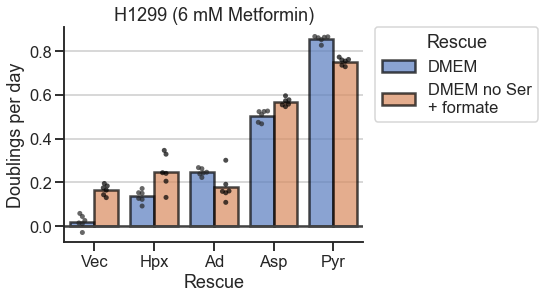

In [75]:
# Plot all data:

comp_list = ['Vec', 'Hpx', 'Ad', 'Asp', 'Pyr']
mask = df['Rescue'].isin(comp_list)

fig, ax1 = plt.subplots(1, 1, figsize=(8, 4.5))

g1 = sns.barplot(ax=ax1, y='Prlfr', x='Rescue', hue='Media', data=df[mask], edgecolor='black', linewidth=2.5, alpha=0.7, ci=None)
g1 = sns.swarmplot(ax=ax1, y='Prlfr', x='Rescue', hue='Media', data=df[mask], alpha=0.7, dodge=True, color='black')
g1.set_ylabel('Doublings per day');
g1.set_xlabel('Rescue');
handles, labels = g1.get_legend_handles_labels()
labels = ['DMEM', 'DMEM no Ser\n+ formate']
g1.legend(loc='upper left', bbox_to_anchor=(1.04, 1), borderaxespad=0, title='Rescue', labels=labels, handles=handles[2:4])
g1.grid(True, axis='y')
#g1.set_ylim(bottom=-0.5, top=1.5);
g1.set_title('H1299 (6 mM Metformin)')
ax1.axhline(y=0, linestyle='-', zorder=1, linewidth=2.5, color='#444444')
sns.despine()
plt.tight_layout()
fig.savefig('comp_Ser-NoSer_data.pdf')

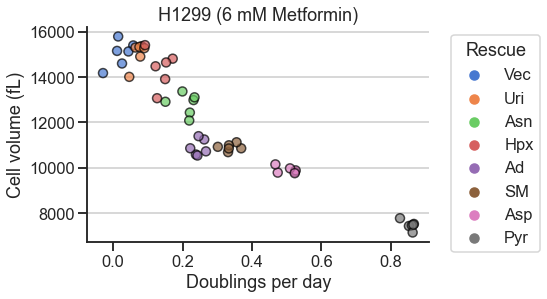

In [15]:
# Plot only normal DMEM media data:
mask = df['Media'] == 'Ser'

fig, ax1 = plt.subplots(1, 1, figsize=(8, 4.5))

g1 = sns.scatterplot(ax=ax1, y='CellVol_mean', x='Prlfr', hue='Rescue', data=df[mask], edgecolor='black', linewidth=1.5, alpha=0.7)
g1.set_xlabel('Doublings per day');
g1.set_ylabel('Cell volume (fL)');
g1.grid(True, axis='y')
#g1.set_ylim(bottom=-0.5, top=1.5);
g1.set_title('H1299 (6 mM Metformin)')
sns.despine()
sns.move_legend(g1, loc='upper left', bbox_to_anchor=(1.04, 1))
plt.tight_layout()
fig.savefig('DMEM_data_cell_vol.pdf', bbox_inches='tight')

In [8]:
df

,Cell_line,Media,Metformin,Rescue,Replicate,Prlfr,CellVol_mean,CellVol_median
0,H1299,Ser,6 mM,Vec,1,0.011087,15151,13676
1,H1299,Ser,6 mM,Vec,2,0.057760,15392,14483
2,H1299,Ser,6 mM,Vec,3,0.014306,15786,14760
3,H1299,Ser,6 mM,Vec,4,-0.029494,14175,13462
4,H1299,Ser,6 mM,Vec,5,0.025386,14597,13916
...,...,...,...,...,...,...,...,...
91,H1299,NoSer+Form,6 mM,Pyr,2,0.754536,8854,8109
92,H1299,NoSer+Form,6 mM,Pyr,3,0.728759,8974,8334
93,H1299,NoSer+Form,6 mM,Pyr,4,0.772733,8581,7899
94,H1299,NoSer+Form,6 mM,Pyr,5,0.759562,8813,7971
